# California Real Estate Price Prediction

### Objective 
The objective of this project was to develop a regression model using a California real estate dataset to predict house prices. Through feature selection and model refinement, the aim was to create a reliable and accurate model that captures the underlying patterns and factors influencing house prices in California.

In [59]:
import pandas as pd

In [60]:
houses = pd.read_csv("houses.csv")

In [61]:
houses.shape

(35389, 39)

In [62]:
houses.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


### Checking For Null Data

In [63]:
houses.isnull().sum()

Unnamed: 0              0
id                      0
stateId                 0
countyId                0
cityId                  0
country                 0
datePostedString        3
is_bankOwned            0
is_forAuction           0
event                 289
time                  289
price                   0
pricePerSquareFoot      0
city                    0
state                   0
yearBuilt               0
streetAddress           1
zipcode                25
longitude               0
latitude                0
hasBadGeocode           0
description           279
currency                0
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county      

Since the missing rows are less than 2% of total rows .I chose to just skip the rows 

In [64]:
houses = houses.dropna()

In [65]:
houses.shape

(34814, 39)

## Exploring The Data 

In [66]:
houses.nunique()

Unnamed: 0            34814
id                    30752
stateId                   1
countyId              33970
cityId                 1047
country                   1
datePostedString        554
is_bankOwned              2
is_forAuction             2
event                     6
time                   1285
price                  4260
pricePerSquareFoot     1961
city                   1231
state                     1
yearBuilt               161
streetAddress         30651
zipcode                1596
longitude             29918
latitude              30213
hasBadGeocode             2
description           30629
currency                  1
livingArea             4664
livingAreaValue        4665
lotAreaUnits              2
bathrooms                26
bedrooms                 30
buildingArea           2745
parking                   2
garageSpaces             29
hasGarage                 2
levels                   48
pool                      2
spa                       2
isNewConstruction   

In [67]:
houses.nunique()[houses.nunique() == 1]

stateId     1
country     1
state       1
currency    1
dtype: int64

Columns having single unique value in dataset do not affect the value of target variable. In Our Case,these columns indicate all the houses belong to the state of California, USA with all prices being in dollars.  

In [68]:
houses = houses.drop(["stateId","country","state","currency"],axis =1)

In [69]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34814 entries, 0 to 35388
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          34814 non-null  int64  
 1   id                  34814 non-null  object 
 2   countyId            34814 non-null  int64  
 3   cityId              34814 non-null  int64  
 4   datePostedString    34814 non-null  object 
 5   is_bankOwned        34814 non-null  int64  
 6   is_forAuction       34814 non-null  int64  
 7   event               34814 non-null  object 
 8   time                34814 non-null  float64
 9   price               34814 non-null  float64
 10  pricePerSquareFoot  34814 non-null  float64
 11  city                34814 non-null  object 
 12  yearBuilt           34814 non-null  int64  
 13  streetAddress       34814 non-null  object 
 14  zipcode             34814 non-null  float64
 15  longitude           34814 non-null  float64
 16  latitude 

### Converting date posting string to datetime datatype

In [70]:
houses["datePostedString"][:5]

0    2021-01-13
1    2021-07-12
2    2021-07-08
3    2021-07-07
4    2021-07-07
Name: datePostedString, dtype: object

In [71]:
houses["datePostedString"] = pd.to_datetime(houses["datePostedString"], format= "%Y-%m-%d")

In Case of Real Estate Prices , Exact Date Does not matter much . We will extract month and year out of it .

In [72]:
houses["month"] = houses["datePostedString"].dt.month
houses["year"] = houses["datePostedString"].dt.year
houses = houses.drop("datePostedString", axis=1)

### Suspicious of Living Area and Living Area Value 

In [73]:
houses["livingArea"].describe()

count    3.481400e+04
mean     3.108576e+03
std      8.415362e+04
min      0.000000e+00
25%      9.120000e+02
50%      1.512000e+03
75%      2.245000e+03
max      9.061351e+06
Name: livingArea, dtype: float64

In [74]:
houses["livingAreaValue"].describe()

count    3.481400e+04
mean     3.109329e+03
std      8.415371e+04
min      0.000000e+00
25%      9.120000e+02
50%      1.512000e+03
75%      2.245000e+03
max      9.061351e+06
Name: livingAreaValue, dtype: float64

Living Area And Living Area Value Are Exact Same Columns , So I decide to remove Living Area Value 

In [75]:
houses = houses.drop("livingAreaValue", axis = 1)

### Splitting The Target and Featues 



We have both the price per square foot column and price column . Both  of them are something we intend to predict . Keeping prixce per square foot in model is not a good idea . Since it is a part of things to be determined 

In [76]:
houses = houses.drop("pricePerSquareFoot", axis = 1)

In [77]:
Y = houses["price"]

In [78]:
Features = houses.drop("price", axis = 1)

### Understanding The Features 

In [79]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34814 entries, 0 to 35388
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         34814 non-null  int64  
 1   id                 34814 non-null  object 
 2   countyId           34814 non-null  int64  
 3   cityId             34814 non-null  int64  
 4   is_bankOwned       34814 non-null  int64  
 5   is_forAuction      34814 non-null  int64  
 6   event              34814 non-null  object 
 7   time               34814 non-null  float64
 8   city               34814 non-null  object 
 9   yearBuilt          34814 non-null  int64  
 10  streetAddress      34814 non-null  object 
 11  zipcode            34814 non-null  float64
 12  longitude          34814 non-null  float64
 13  latitude           34814 non-null  float64
 14  hasBadGeocode      34814 non-null  int64  
 15  description        34814 non-null  object 
 16  livingArea         34814 no

I think Id does not have a relationship with price of houses, Lets check it 

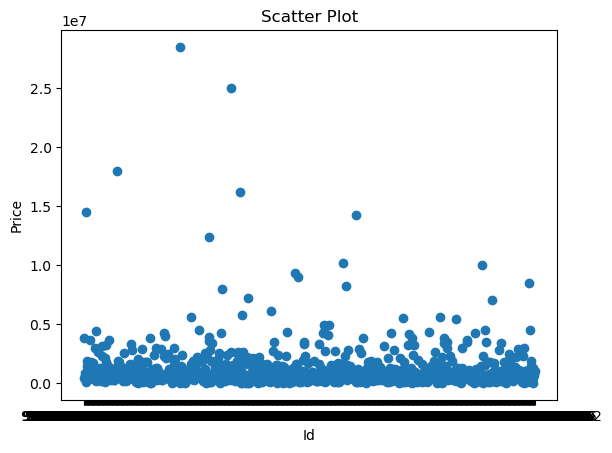

In [80]:
import matplotlib.pyplot as plt 
sampled_data = houses.sample(n=1000)
plt.scatter(sampled_data['id'], sampled_data["price"])
plt.xlabel('Id')
plt.ylabel('Price')
plt.title('Scatter Plot')
plt.show()

Looking at this graph ,I can definitely say there is no linear relationship between id and price. So, Lets  drop it.

In [81]:
Features = Features.drop(["id"], axis = 1)

CityId and CountyId are also categorical values, Since they represent the county type and city id , Lets see if there is a pattern

In [82]:
Features.nunique()

Unnamed: 0           34814
countyId             33970
cityId                1047
is_bankOwned             2
is_forAuction            2
event                    6
time                  1285
city                  1231
yearBuilt              161
streetAddress        30651
zipcode               1596
longitude            29918
latitude             30213
hasBadGeocode            2
description          30629
livingArea            4664
lotAreaUnits             2
bathrooms               26
bedrooms                30
buildingArea          2745
parking                  2
garageSpaces            29
hasGarage                2
levels                  48
pool                     2
spa                      2
isNewConstruction        2
hasPetsAllowed           2
homeType                 6
county                  58
month                   12
year                     9
dtype: int64

### Splitting Categorical And Numerical Features 

In [83]:
categoricalFeatures = Features[["countyId","cityId","is_bankOwned","is_forAuction","event","time","city","yearBuilt","streetAddress","zipcode","hasBadGeocode",
                                "description","lotAreaUnits","parking","hasGarage","levels","pool","spa","isNewConstruction","hasPetsAllowed","homeType","county",
                                "month","year"]]

In [84]:
numerical_features = Features[["latitude","longitude","livingArea","bathrooms","bedrooms","buildingArea","garageSpaces"]]

## Feature Selection 

County Id has too many labels . Lets explore it.

In [85]:
categoricalFeatures["countyId"].value_counts(ascending=False)

countyId
35250     2
23161     2
67991     2
76102     2
76101     2
         ..
151541    1
151540    1
151539    1
151511    1
130370    1
Name: count, Length: 33970, dtype: int64

If almost each row has a unique value in the countyId(categorical column), it suggests that the column does not provide any meaningful patterns or information that can contribute to predicting the target variable. The lack of consistency or common categories makes it difficult for the model to learn useful patterns or relationships. 

In [86]:
categoricalFeatures.drop(["countyId"],inplace=True,axis=1)

C:\Users\RTX\AppData\Local\Temp\ipykernel_14884\401318770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalFeatures.drop(["countyId"],inplace=True,axis=1)


In [87]:
categoricalFeatures["description"].value_counts()

description
Seller financing easy terms Nice flat lot with paved street and utilities on the street. Existing homes next door. Buyers to do their due diligence.  Address is just an approximate.  Property purchased at Gov tax sale.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Since We are interested in linear regression Model and not particularly interested in getting features from description, We skip description column for now. Though , Including it in more complexproject may lead to greater accuracy. 

Similarly, I decide to skip the Street Adress Colummn 

In [88]:
categoricalFeatures= categoricalFeatures.drop(["streetAddress","description"],axis =1)

In [89]:
categoricalFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34814 entries, 0 to 35388
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cityId             34814 non-null  int64  
 1   is_bankOwned       34814 non-null  int64  
 2   is_forAuction      34814 non-null  int64  
 3   event              34814 non-null  object 
 4   time               34814 non-null  float64
 5   city               34814 non-null  object 
 6   yearBuilt          34814 non-null  int64  
 7   zipcode            34814 non-null  float64
 8   hasBadGeocode      34814 non-null  int64  
 9   lotAreaUnits       34814 non-null  object 
 10  parking            34814 non-null  int64  
 11  hasGarage          34814 non-null  int64  
 12  levels             34814 non-null  object 
 13  pool               34814 non-null  int64  
 14  spa                34814 non-null  int64  
 15  isNewConstruction  34814 non-null  int64  
 16  hasPetsAllowed     34814 no

In [90]:
categoricalFeatures["city"].value_counts()[:800]

city
Los Angeles      1635
San Diego        1019
San Francisco     740
Sacramento        698
San Jose          671
                 ... 
Olancha             7
Salyer              7
Bella Vista         7
Monte Rio           7
Millville           7
Name: count, Length: 800, dtype: int64

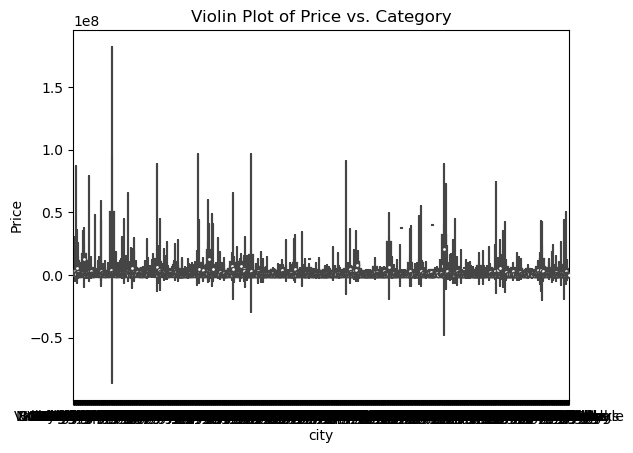

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the violin plot using Seaborn
sns.violinplot(x='city', y='price',data=houses )

# Add labels and title
plt.xlabel('city')
plt.ylabel('Price')
plt.title('Violin Plot of Price vs. Category')

# Show the plot
plt.show()


As No of features are so much,,and big cities are making up top counts from the population,Let us try to use Top N label technique

In [94]:
import pandas as pd

# Assuming 'data' is your DataFrame with the categorical column ('category_col')

# Determine the top N most frequent labels
top_n = 10
top_labels = houses['city'].value_counts().nlargest(top_n).index
houses["city10"] = houses["city"]
# Replace less frequent labels with 'Others'
houses.loc[~houses['city'].isin(top_labels), 'city10'] = 'Others'


In [95]:
houses['city10'].value_counts()

city10
Others           28202
Los Angeles       1635
San Diego         1019
San Francisco      740
Sacramento         698
San Jose           671
Fresno             446
Oakland            418
Bakersfield        346
Long Beach         340
Stockton           299
Name: count, dtype: int64

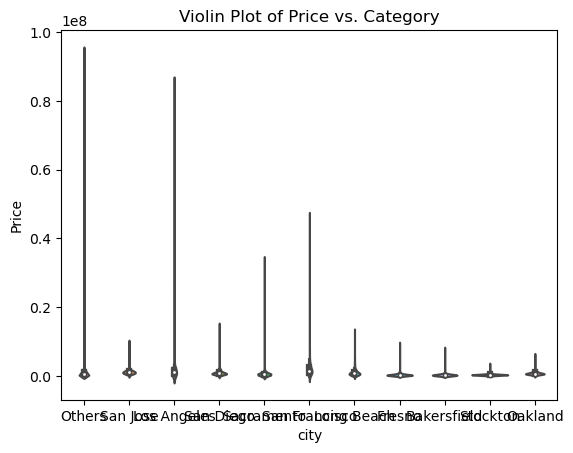

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the violin plot using Seaborn
sns.violinplot(x='city10', y='price',data=houses )

# Add labels and title
plt.xlabel('city')
plt.ylabel('Price')
plt.title('Violin Plot of Price vs. Category')

# Show the plot
plt.show()

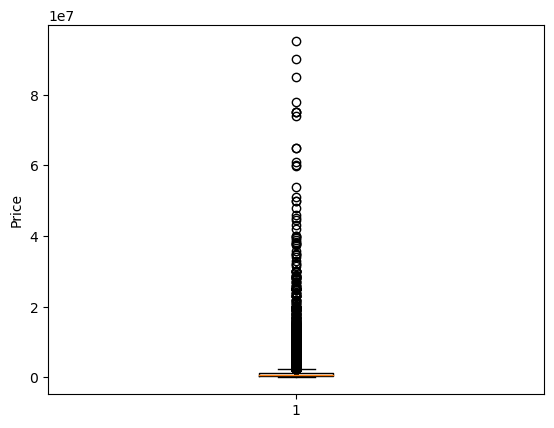

In [97]:
plt.boxplot(houses['price'])
plt.ylabel('Price')
plt.show()

Having nearly 90 % of data as others is not a good idea . Lets take top 100 labels together 

In [98]:
import pandas as pd

# Assuming 'data' is your DataFrame with the categorical column ('category_col')

# Determine the top N most frequent labels
top_n = 100
top_labels = houses['city'].value_counts().nlargest(top_n).index
houses["city100"] = houses["city"]
# Replace less frequent labels with 'Others'
houses.loc[~houses['city'].isin(top_labels), 'city100'] = 'Others'

In [99]:
houses["city100"].value_counts()

city100
Others           18590
Los Angeles       1635
San Diego         1019
San Francisco      740
Sacramento         698
                 ...  
Sherman Oaks        70
Alhambra            68
Costa Mesa          68
West Covina         67
La Jolla            65
Name: count, Length: 101, dtype: int64

Lets wipe out city Id and zipcode Column as they represent same information

In [100]:
categoricalFeatures= categoricalFeatures.drop(["city","cityId","zipcode"],axis = 1)

In [56]:
categoricalFeatures["city"] = houses["city100"]

In [101]:
categoricalFeatures.nunique()

is_bankOwned            2
is_forAuction           2
event                   6
time                 1285
yearBuilt             161
hasBadGeocode           2
lotAreaUnits            2
parking                 2
hasGarage               2
levels                 48
pool                    2
spa                     2
isNewConstruction       2
hasPetsAllowed          2
homeType                6
county                 58
month                  12
year                    9
dtype: int64

Every Column here except time column has sane number of labels. Lets explore it 

In [102]:
categoricalFeatures["time"].value_counts()

time
1.624320e+12    4014
1.625789e+12    3813
1.625702e+12    3068
1.625616e+12    1872
1.626048e+12    1819
                ... 
1.359331e+12       1
1.587254e+12       1
1.599264e+12       1
1.185840e+12       1
1.571357e+12       1
Name: count, Length: 1285, dtype: int64

It's a kind of bizzare column , may be represennting time when data was scrapped or something like that so lets drop it.

In [103]:
categoricalFeatures = categoricalFeatures.drop(["time"],axis= 1)

### Performing Tests and Selecting Final Features 

As each categorical column has sanenumber of categorical labels now, Lets selectthose column which are important 

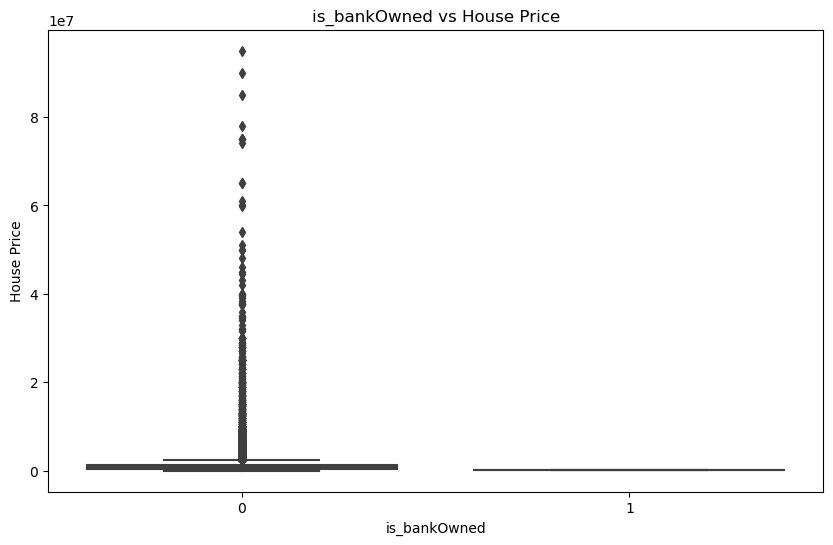

Feature: is_bankOwned
ANOVA - F-value: 0.5239311551184251
ANOVA - p-value: 0.4691744273960706



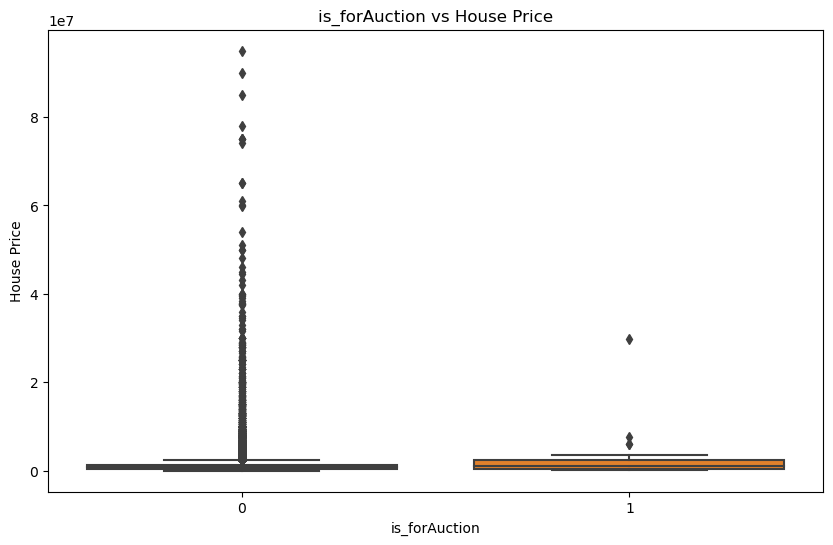

Feature: is_forAuction
ANOVA - F-value: 12.232188956738648
ANOVA - p-value: 0.0004703060766724353



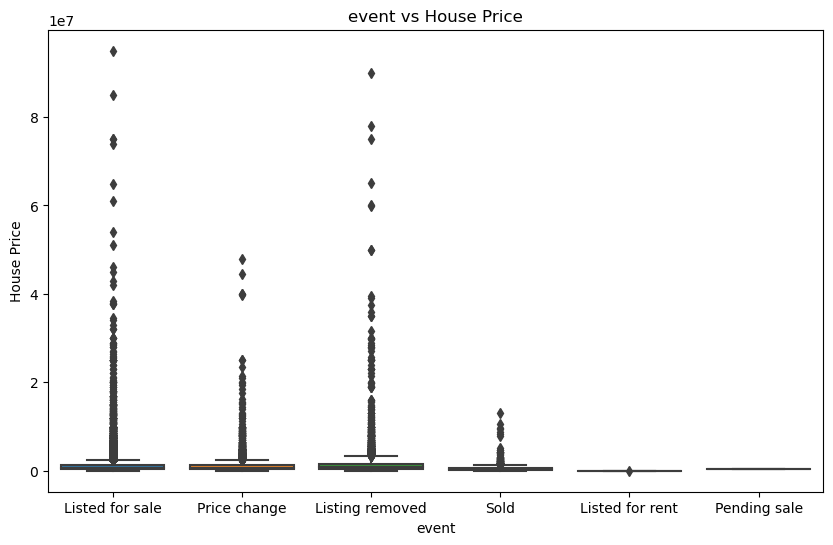

Feature: event
ANOVA - F-value: 37.88408393537175
ANOVA - p-value: 6.663795961846962e-39



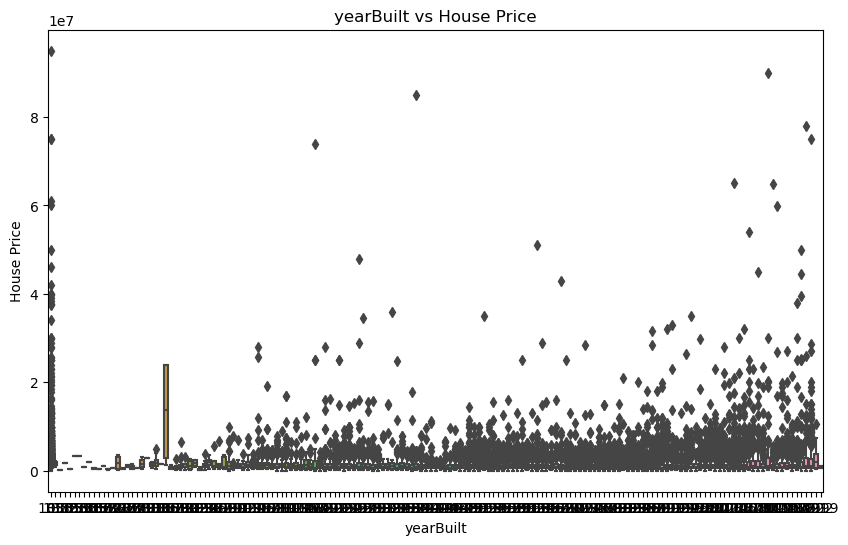

Feature: yearBuilt
ANOVA - F-value: 5.71131640028665
ANOVA - p-value: 3.825456951310569e-104



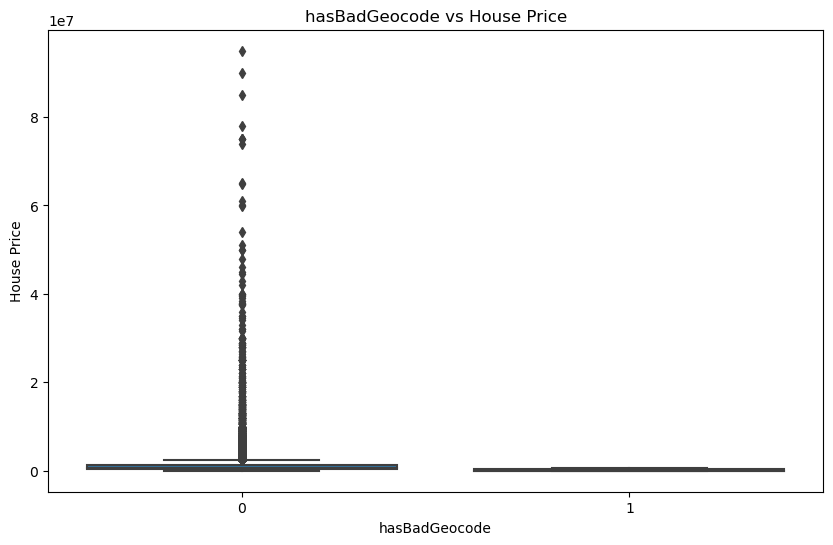

Feature: hasBadGeocode
ANOVA - F-value: 0.41979949159000174
ANOVA - p-value: 0.5170413840609329



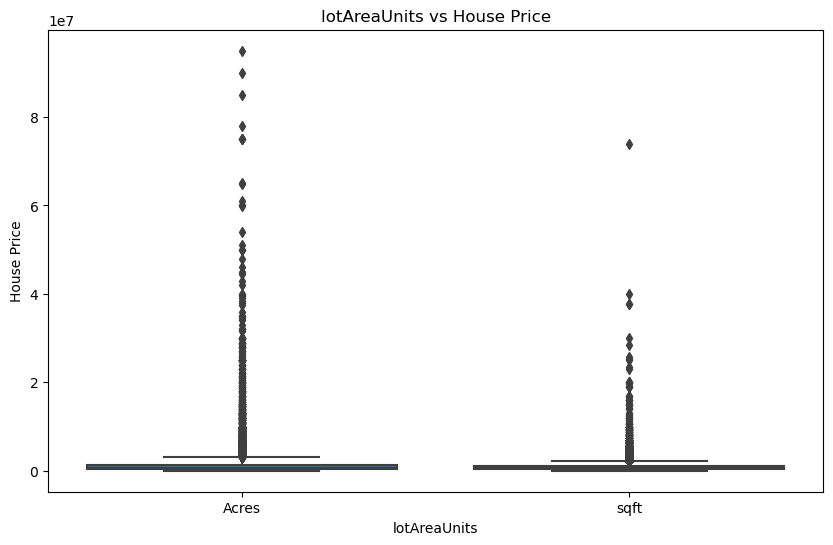

Feature: lotAreaUnits
ANOVA - F-value: 385.8271243559255
ANOVA - p-value: 1.9480443995902e-85



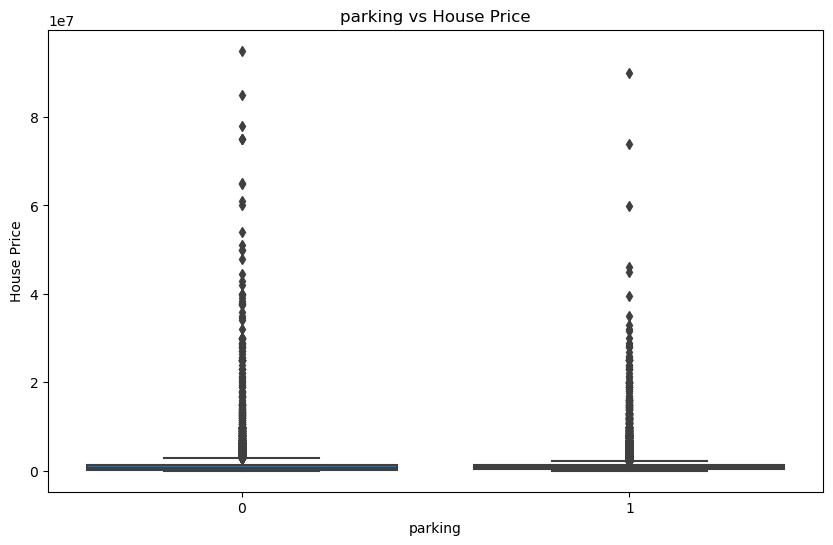

Feature: parking
ANOVA - F-value: 9.384365292118376
ANOVA - p-value: 0.0021901093197876594



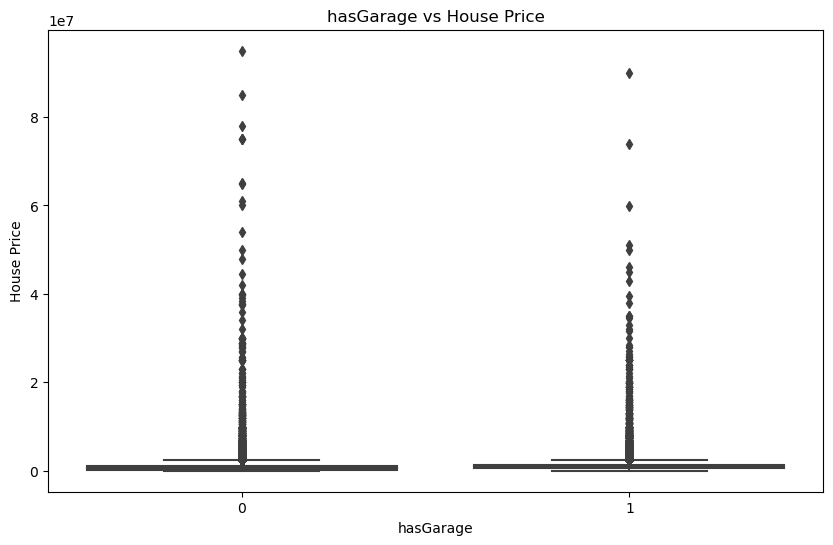

Feature: hasGarage
ANOVA - F-value: 60.46989297183245
ANOVA - p-value: 7.67641774208926e-15



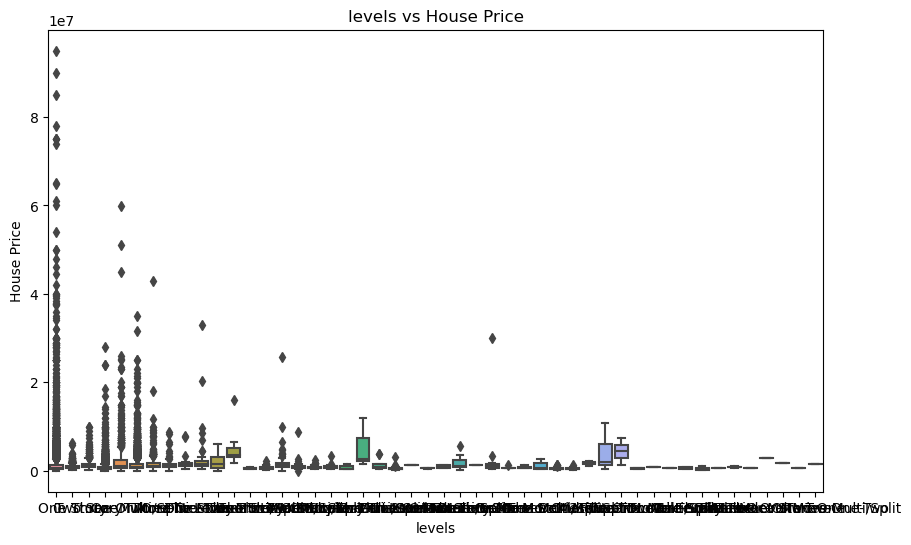

Feature: levels
ANOVA - F-value: 12.011720471017117
ANOVA - p-value: 4.898286860573956e-89



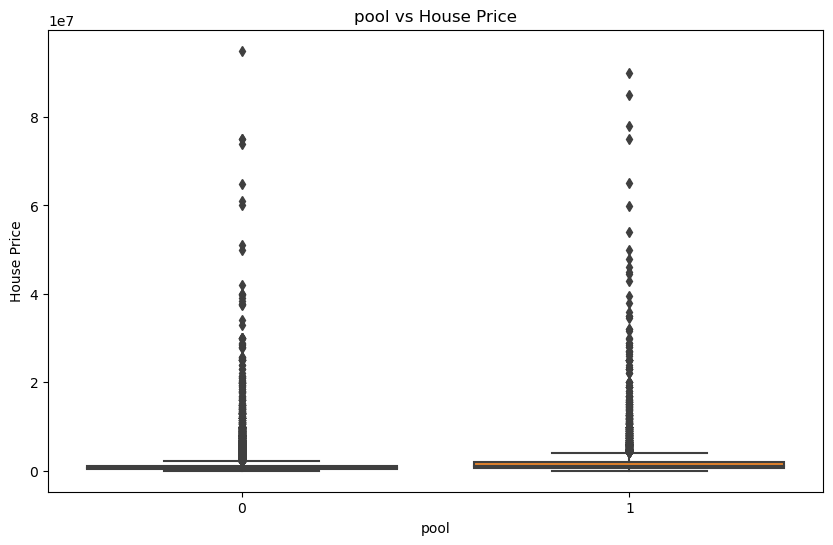

Feature: pool
ANOVA - F-value: 819.7410548336625
ANOVA - p-value: 3.2253759223524013e-178



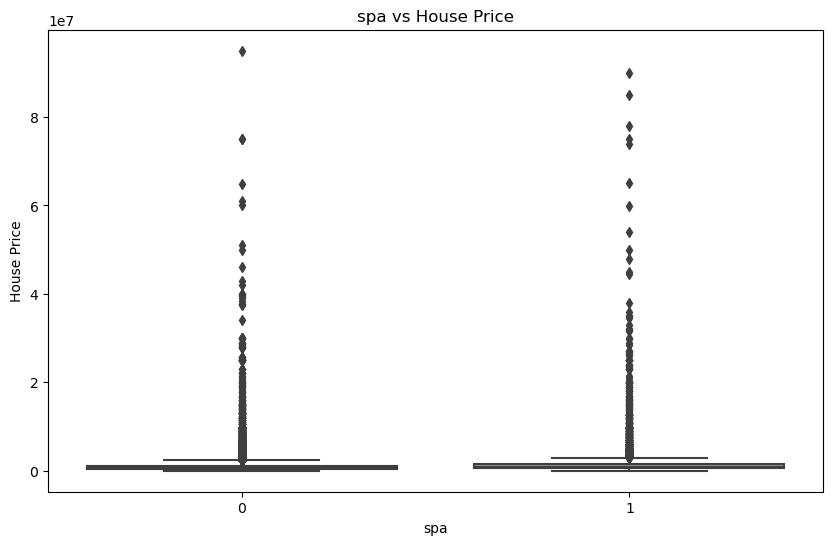

Feature: spa
ANOVA - F-value: 395.85187322625967
ANOVA - p-value: 1.3534453507876869e-87



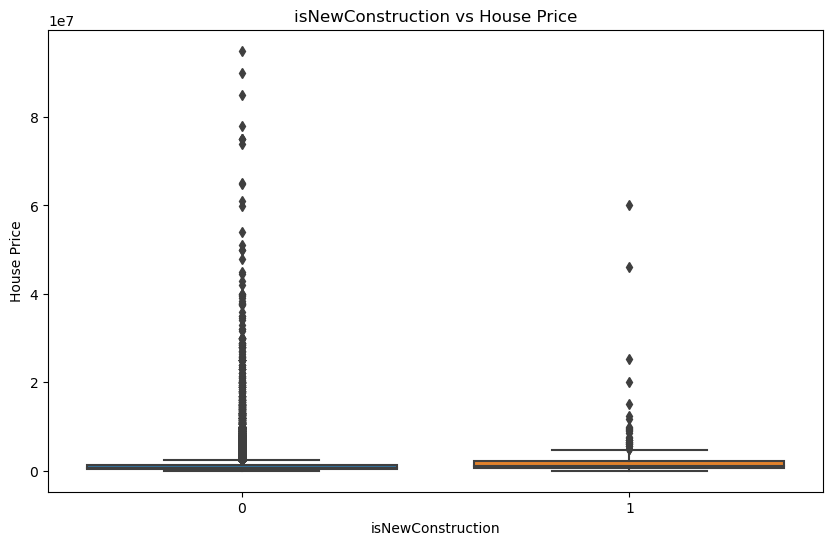

Feature: isNewConstruction
ANOVA - F-value: 47.401191981522636
ANOVA - p-value: 5.882727293765945e-12



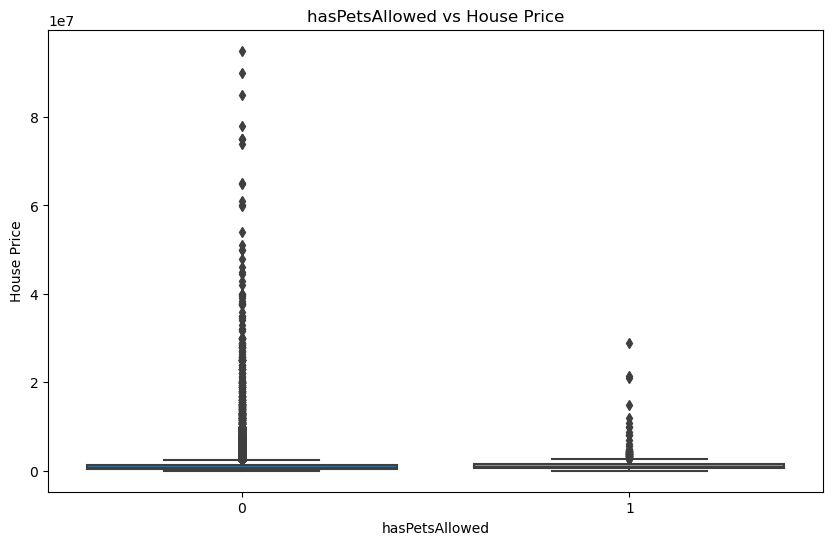

Feature: hasPetsAllowed
ANOVA - F-value: 4.811451660970505
ANOVA - p-value: 0.0282778088034834



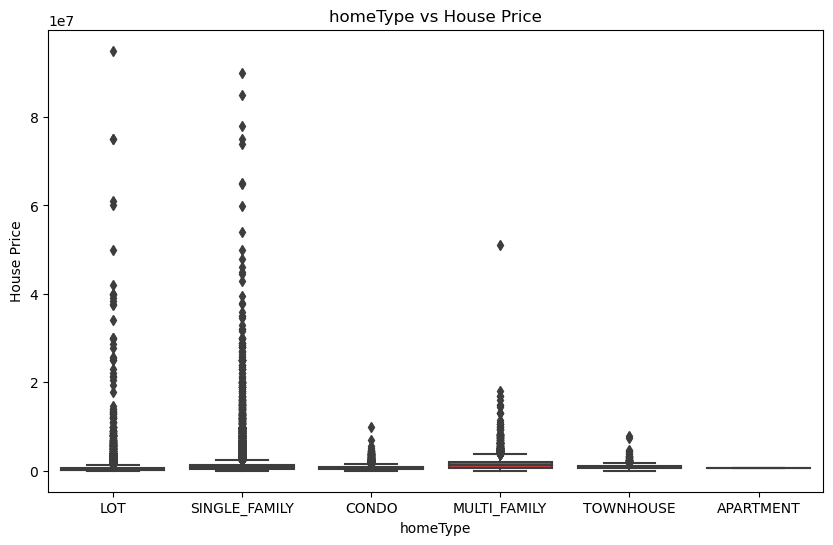

Feature: homeType
ANOVA - F-value: 73.71676542791441
ANOVA - p-value: 4.5202951924398455e-77



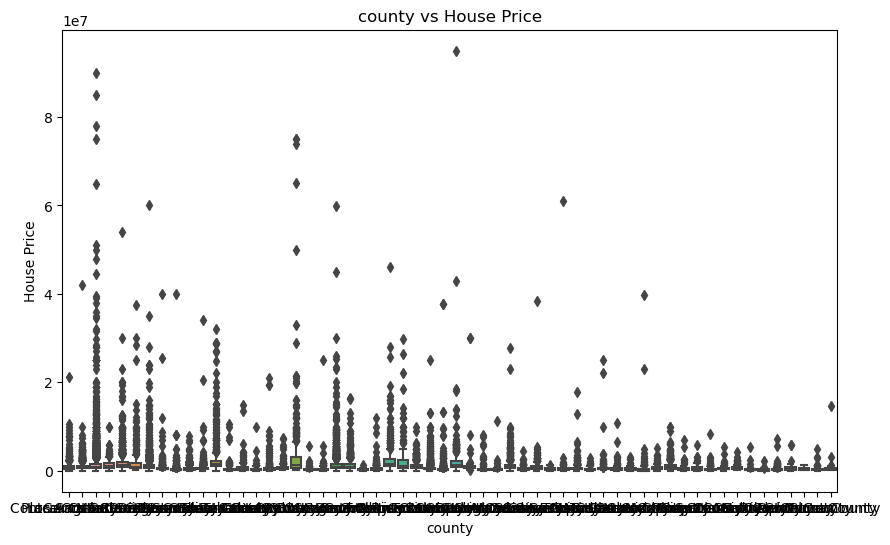

Feature: county
ANOVA - F-value: 34.76297837412977
ANOVA - p-value: 0.0



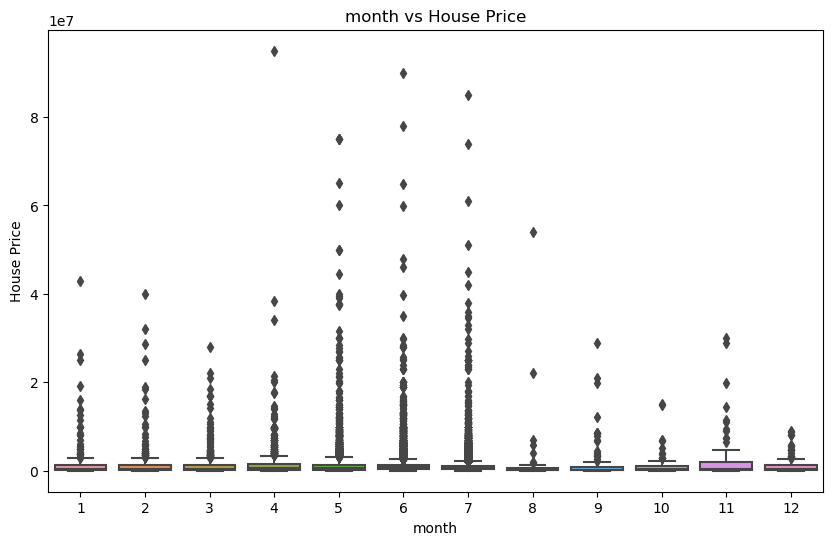

Feature: month
ANOVA - F-value: 18.87615299188856
ANOVA - p-value: 2.559407489491843e-38



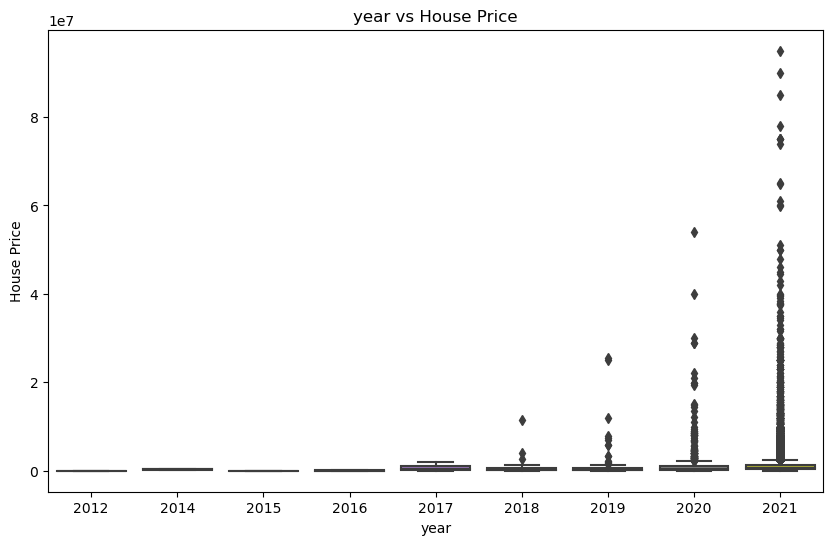

Feature: year
ANOVA - F-value: 1.213604024095578
ANOVA - p-value: 0.2860980991401759



In [107]:
from scipy.stats import f_oneway

# Assuming 'data' is your DataFrame with multiple categorical features and 'house_price' is the target variable

categorical_features = categoricalFeatures.columns  # List of categorical features
final_cat_features = []

for feature in categorical_features:
    # Perform ANOVA test
    result = f_oneway(*[group['price'] for name, group in houses.groupby(feature)])

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=houses)
    plt.title(f'{feature} vs House Price')
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.show()

    # Print test results
    print("Feature:", feature)
    print("ANOVA - F-value:", result.statistic)
    print("ANOVA - p-value:", result.pvalue)
    print()
    if result.pvalue < 0.05:
        final_cat_features.append(feature)


In [108]:
Final_Cat_Features = categoricalFeatures[final_cat_features]

In [109]:
Final_Cat_Features.nunique()

is_forAuction          2
event                  6
yearBuilt            161
lotAreaUnits           2
parking                2
hasGarage              2
levels                48
pool                   2
spa                    2
isNewConstruction      2
hasPetsAllowed         2
homeType               6
county                58
month                 12
dtype: int64

Lets Encode categorical Features

In [110]:
import pandas as pd

# Assuming 'data' is your pandas DataFrame containing all the features
encoded_data = pd.get_dummies(Final_Cat_Features)


In [111]:
encoded_data.columns

Index(['is_forAuction', 'yearBuilt', 'parking', 'hasGarage', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'month', 'event_Listed for rent',
       ...
       'county_Sonoma County', 'county_Stanislaus County',
       'county_Sutter County', 'county_Tehama County', 'county_Trinity County',
       'county_Tulare County', 'county_Tuolumne County',
       'county_Ventura County', 'county_Yolo County', 'county_Yuba County'],
      dtype='object', length=129)

### Treating Numerical Features 

In [112]:
numerical_features.describe()

,latitude,longitude,livingArea,bathrooms,bedrooms,buildingArea,garageSpaces
count,34814.000000,34814.000000,3.481400e+04,34814.000000,34814.000000,3.481400e+04,34814.000000
mean,35.882173,-119.608632,3.108576e+03,2.043402,2.649624,7.159707e+02,1.013874
std,2.282192,2.071844,8.415362e+04,1.691801,2.022339,4.872755e+04,1.473736
min,32.544464,-124.343575,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,33.974910,-121.712608,9.120000e+02,1.000000,2.000000,0.000000e+00,0.000000
50%,34.877867,-118.979885,1.512000e+03,2.000000,3.000000,0.000000e+00,0.000000
75%,37.854119,-117.905088,2.245000e+03,3.000000,4.000000,0.000000e+00,2.000000
max,41.997974,-114.364960,9.061351e+06,58.000000,99.000000,9.061351e+06,88.000000


We are building a regression model. So we decide to drop latitude and longitude . In future model , they can be used using some clustering algorithms to provide more advanced results 

In [113]:
numerical_features.drop(["latitude","longitude"],axis = 1,inplace = True)

C:\Users\RTX\AppData\Local\Temp\ipykernel_14884\2418739781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features.drop(["latitude","longitude"],axis = 1,inplace = True)


Price vs Living Area 

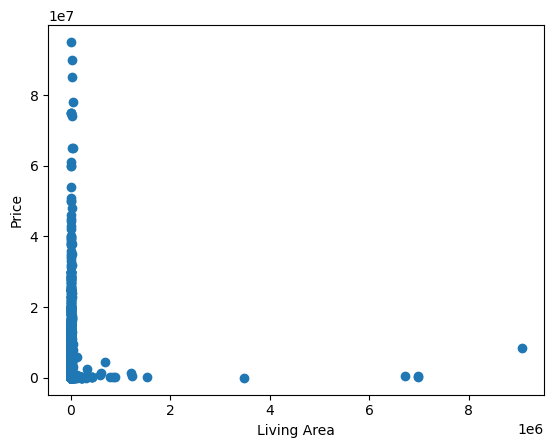

In [114]:
plt.scatter(numerical_features["livingArea"], Y , label='Price Vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

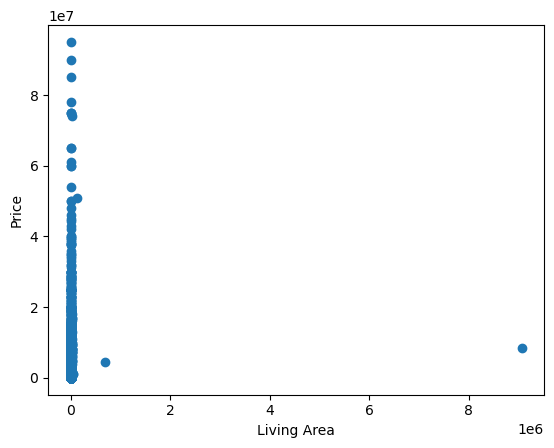

In [115]:
plt.scatter(numerical_features["buildingArea"], Y , label='Price Vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

In [116]:
numerical_features["total_area"] = numerical_features["livingArea"] + numerical_features["buildingArea"]

C:\Users\RTX\AppData\Local\Temp\ipykernel_14884\680507297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features["total_area"] = numerical_features["livingArea"] + numerical_features["buildingArea"]


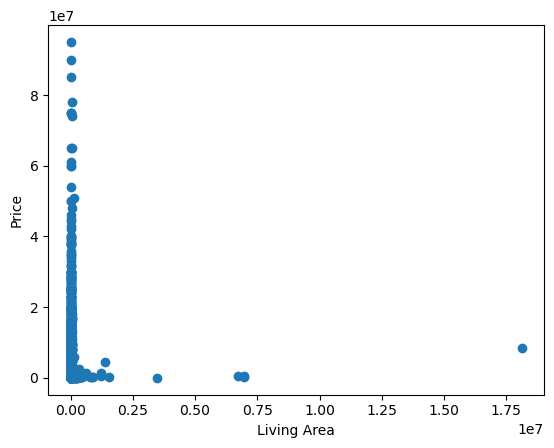

In [117]:
plt.scatter(numerical_features["total_area"], Y , label='Price Vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

In [118]:
numerical_features.drop(["total_area"],axis=1,inplace=True)

C:\Users\RTX\AppData\Local\Temp\ipykernel_14884\2083272159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features.drop(["total_area"],axis=1,inplace=True)


We can see that Price of house does not depend only on area but rather on all features combined 

## Building the Regression Model 

In [120]:
encoded_data.head()

,is_forAuction,yearBuilt,parking,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed,month,event_Listed for rent,...,county_Sonoma County,county_Stanislaus County,county_Sutter County,county_Tehama County,county_Trinity County,county_Tulare County,county_Tuolumne County,county_Ventura County,county_Yolo County,county_Yuba County
0,0,0,0,0,0,0,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1958,1,1,0,0,0,0,7,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1959,1,1,0,0,0,0,7,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1908,1,1,0,1,0,0,7,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,0,0,7,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
numerical_features.head()

,livingArea,bathrooms,bedrooms,buildingArea,garageSpaces
0,0.0,0.0,0.0,0.0,0.0
1,1671.0,2.0,3.0,1671.0,2.0
2,1414.0,2.0,3.0,1414.0,2.0
3,1336.0,2.0,3.0,1336.0,1.0
4,0.0,0.0,0.0,0.0,0.0


In [122]:
X = pd.concat([encoded_data, numerical_features], axis=1) 

In [123]:
Y.head()

0    145000.0
1    675000.0
2    649000.0
3    599000.0
4    299000.0
Name: price, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your input dataset and 'target' is the corresponding target variable (e.g., house prices)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [127]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Root Mean Squared Error (MSE): 2372801.168042872
R-squared (R2): 0.24531381464844493


## Model Conclusion

After careful analysis and building a linear regression model to predict house prices, it is important to reflect on the obtained results. The model achieved an R-squared (R2) value of 0.24, indicating that approximately 24% of the variability in the target variable could be explained by the selected features and the linear regression approach.

While an R2 value of 0.24 may not meet the desired level of predictive performance, it is crucial to consider the inherent challenges in predicting house prices accurately. Factors influencing housing prices can be complex and multifaceted, often extending beyond the scope of the available features or the assumptions of a linear regression model.

It is worth noting that even though efforts were made in feature selection and other model refinement techniques, the limited explanatory power suggests the presence of unaccounted influential factors or non-linear relationships in the data.

Therefore, this outcome serves as a valuable learning experience, highlighting the complexities involved in modeling house prices accurately. It is important to explore alternative modeling approaches, such as non-linear regression, ensemble methods, or incorporating domain-specific knowledge to capture the underlying dynamics more effectively.

Moving forward, it is recommended to assess other evaluation metrics like mean squared error (MSE) and thoroughly analyze the residuals to gain deeper insights into the model's performance. Additionally, considering the potential incorporation of additional relevant features or external data sources could help enhance the predictive capabilities of the model.

Remember that model building is an iterative process, and each iteration brings new insights and opportunities for improvement. By leveraging these findings, future iterations can strive towards developing more accurate and robust models to predict house prices effectively.